In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

/tmp/ipython-input-2891900888.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  google_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
import pandas as pd

if isinstance(google_data.columns, pd.MultiIndex):
    google_data.columns = [col[0] if isinstance(col, tuple) and len(col) > 0 else col for col in google_data.columns]

google_data.columns = google_data.columns.astype(str).str.strip()
print('Columns after normalization:', google_data.columns.tolist())

Columns after normalization: ['Close', 'High', 'Low', 'Open', 'Volume']


In [5]:
google_data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2006-02-07,9.095436,9.485537,8.982460,9.467985,667701363
2006-02-08,9.124112,9.163914,8.767879,9.109279,835283155
2006-02-09,8.869236,9.255628,8.803477,9.176521,478282024
2006-02-10,8.964165,9.010889,8.730055,8.947850,611222457
2006-02-13,8.546129,8.667263,8.451941,8.569368,791668286


In [6]:
google_data.shape

(5032, 5)

In [7]:
google_data.describe()

,Close,High,Low,Open,Volume
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,60.142792,60.771380,59.485935,60.112609,8.594499e+07
std,61.322903,62.014922,60.588159,61.281318,1.035041e+08
min,6.364233,6.659158,6.113560,6.489570,1.584340e+05
25%,14.461734,14.588863,14.323791,14.496220,2.500428e+07
50%,35.479153,35.809922,35.142428,35.547889,4.130854e+07
75%,88.970087,90.229264,87.930998,88.899485,1.078979e+08
max,344.899994,350.149994,338.589996,348.515015,1.583417e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2006-02-07 to 2026-02-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5032 non-null   float64
 1   High    5032 non-null   float64
 2   Low     5032 non-null   float64
 3   Open    5032 non-null   float64
 4   Volume  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [9]:
google_data.isna().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

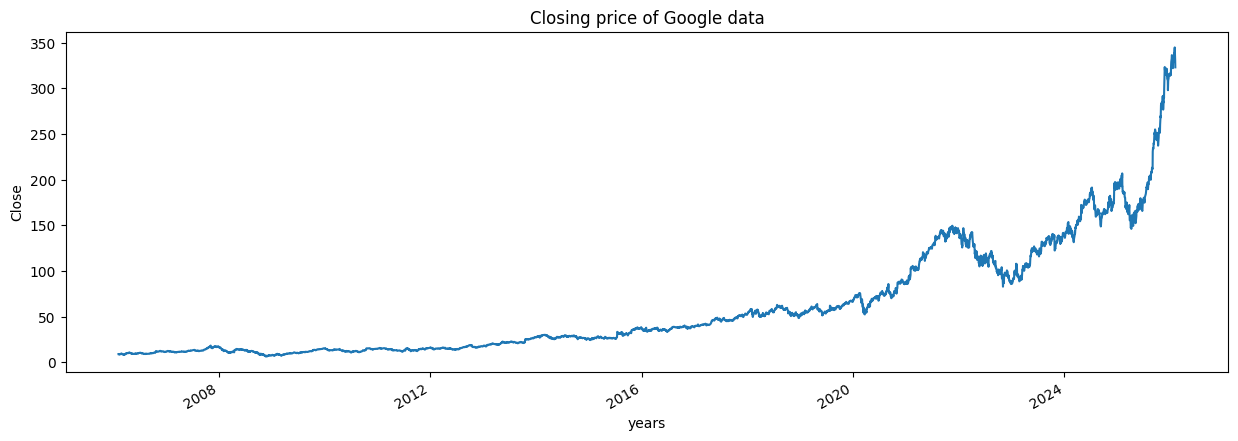

In [11]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [13]:
google_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

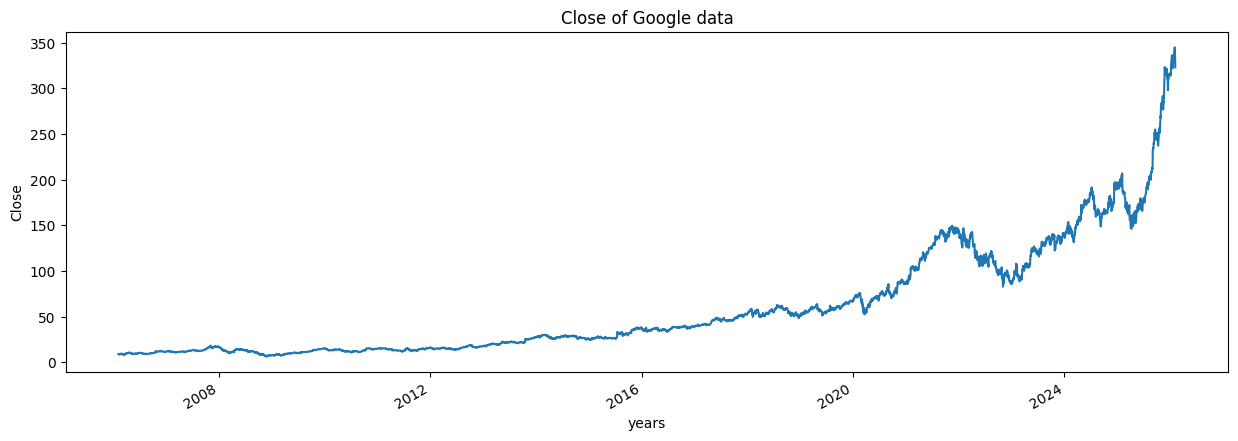

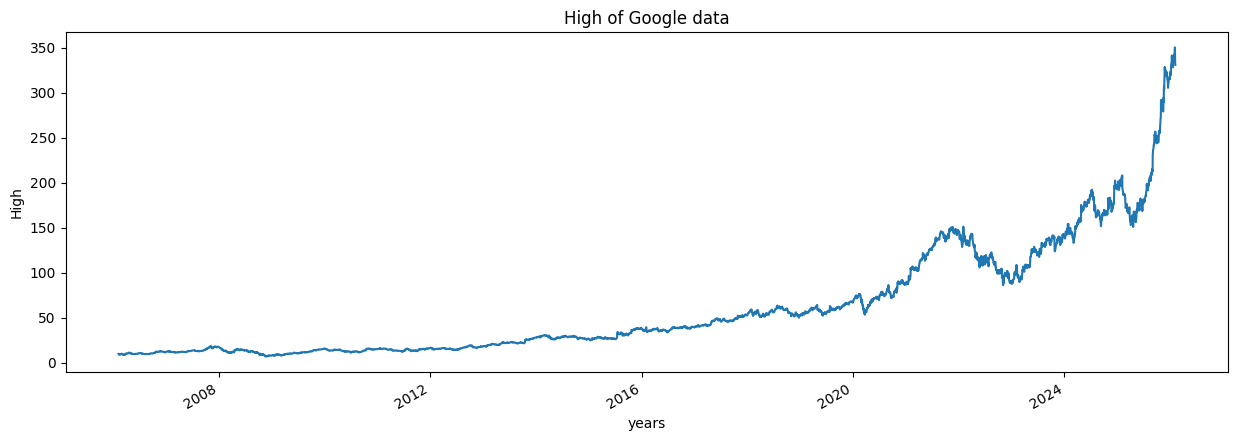

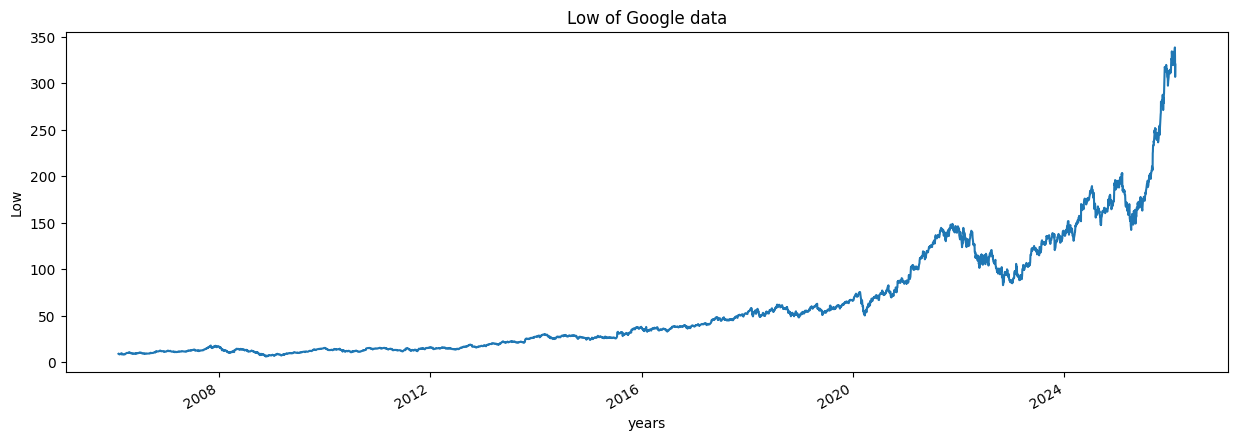

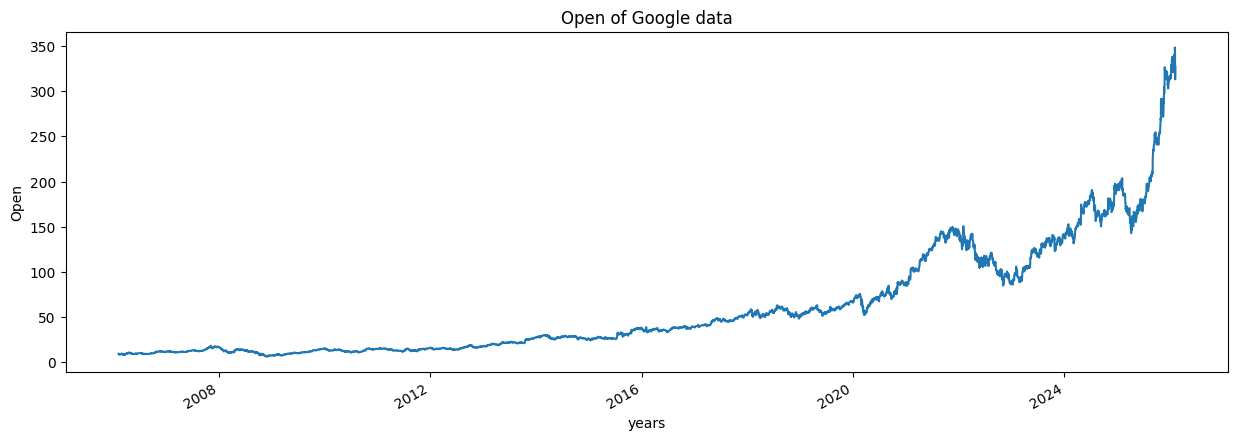

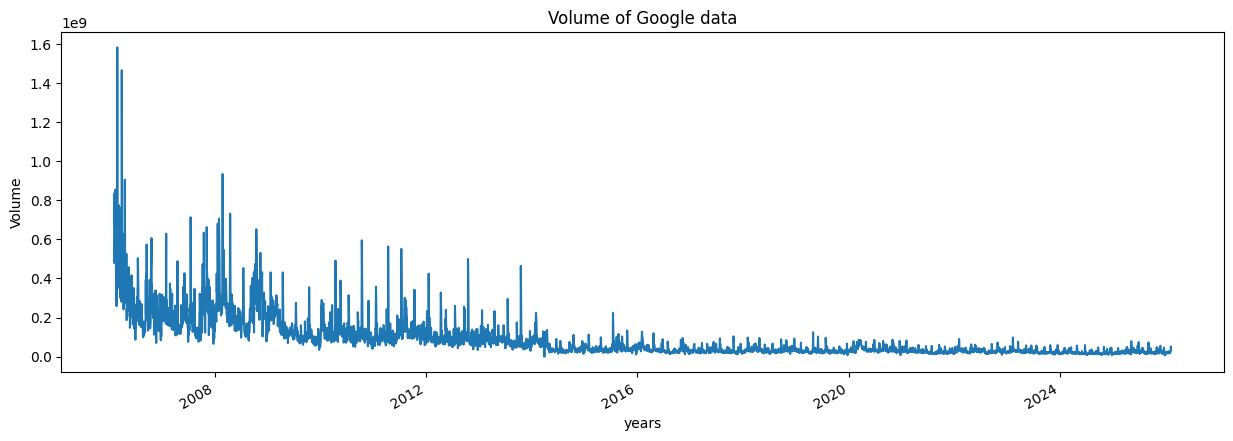

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 227
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [20]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2007-01-30,NaN
2007-01-31,NaN
2007-02-01,NaN
2007-02-02,NaN
2007-02-05,10.281147


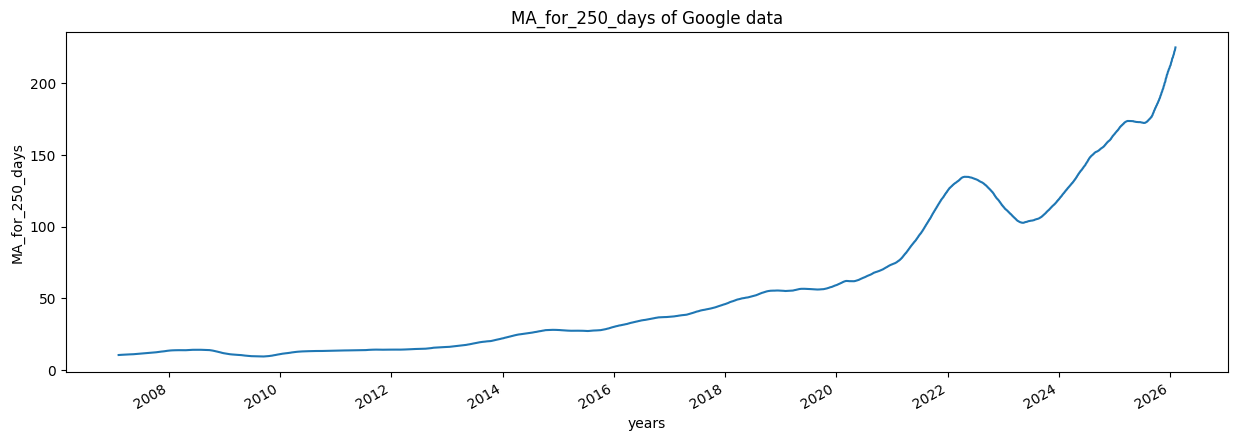

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

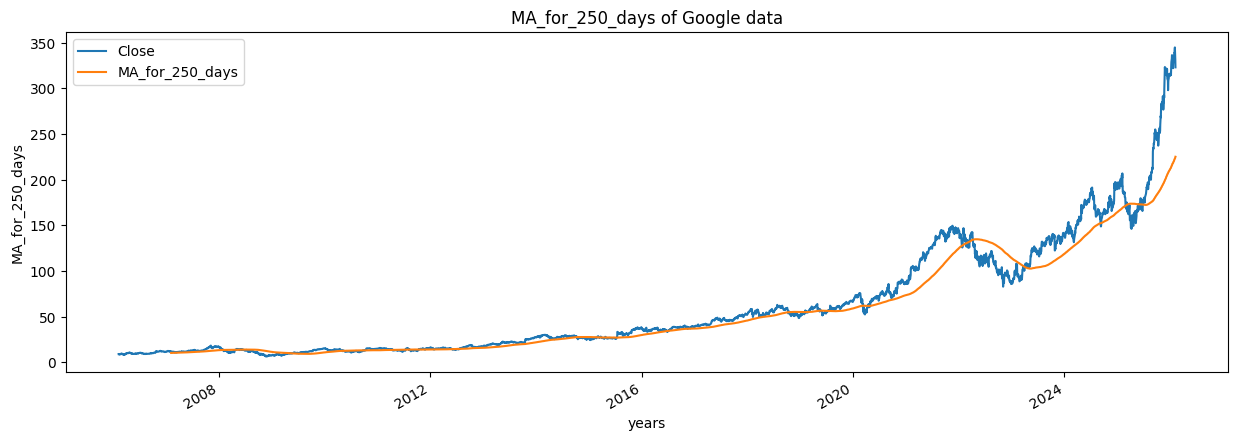

In [23]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

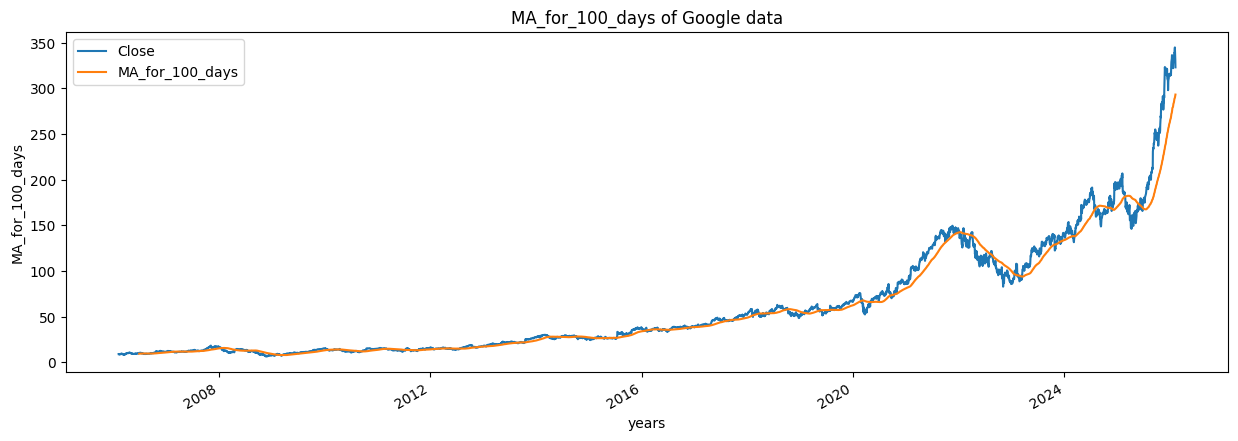

In [24]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

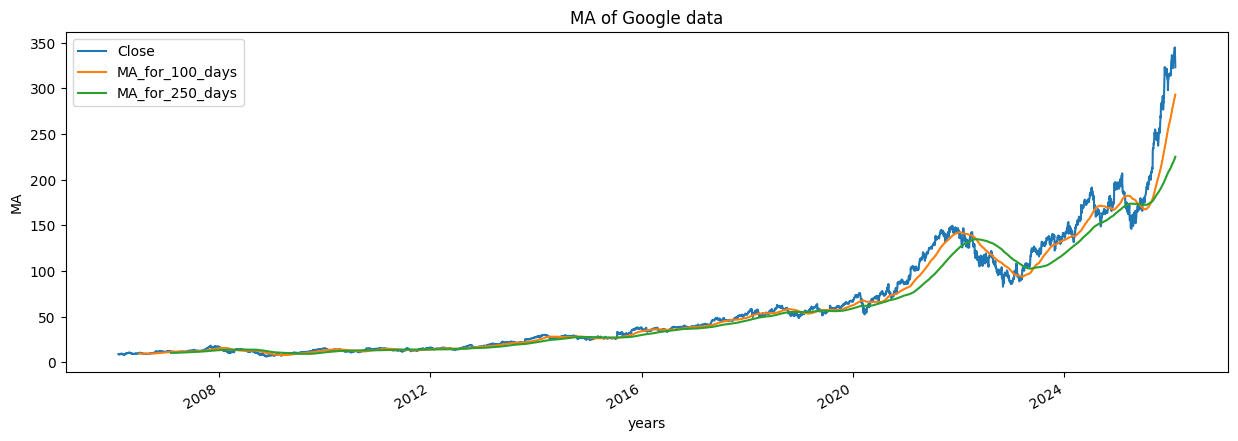

In [25]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

,Close,percentage_change_cp
Date,,
2006-02-07,9.095436,NaN
2006-02-08,9.124112,0.003153
2006-02-09,8.869236,-0.027934
2006-02-10,8.964165,0.010703
2006-02-13,8.546129,-0.046634


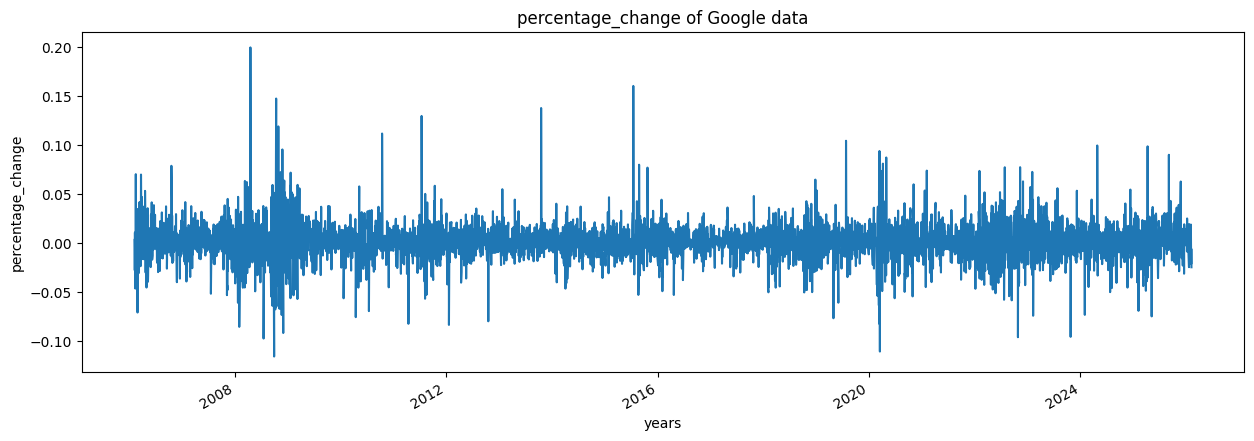

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = google_data[['Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([344.8999939]), array([6.36423302]))

In [ ]:
from pytorch_scaler import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00806769],
       [0.0081524 ],
       [0.00739952],
       ...,
       [0.96585295],
       [0.95991559],
       [0.93560507]])

In [31]:
len(scaled_data)

5032

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[0.00806769],
        [0.0081524 ],
        [0.00739952],
        [0.00767993],
        [0.0064451 ],
        [0.0062713 ],
        [0.00620266],
        [0.00796108],
        [0.0081283 ],
        [0.00797057],
        [0.00789025],
        [0.00880888],
        [0.00875996],
        [0.00970781],
        [0.00768066],
        [0.00783985],
        [0.00869059],
        [0.00881692],
        [0.00808083],
        [0.0078143 ],
        [0.00704244],
        [0.00624794],
        [0.0058463 ],
        [0.00581417],
        [0.00684381],
        [0.00635747],
        [0.00593904],
        [0.00601352],
        [0.00662693],
        [0.00602302],
        [0.00604493],
        [0.00616688],
        [0.00791288],
        [0.00819695],
        [0.00874535],
        [0.01004372],
        [0.00956615],
        [0.00968006],
        [0.00965815],
        [0.01072722],
        [0.01099377],
        [0.01122671],
        [0.01086013],
        [0.01160644],
        [0.01111571],
        [0

In [34]:
int(len(x_data)*0.7)

3452

In [35]:
4908-100-int(len(x_data)*0.7)

1356

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [39]:
class StockPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim):
        super(StockPredictor, self).__init__()
        self.lstm1 = nn.LSTM(input_dim, hidden_dim_1, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_dim_1, hidden_dim_2, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim_2, 25)
        self.fc2 = nn.Linear(25, output_dim)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out = out[:, -1, :]
        out = self.fc1(out)
        out = self.fc2(out)
        return out

input_dim = 1
hidden_dim_1 = 128
hidden_dim_2 = 64
output_dim = 1

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = StockPredictor(input_dim, hidden_dim_1, hidden_dim_2, output_dim).to(device)

Using device: cpu


In [40]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [41]:
print(model)

StockPredictor(
  (lstm1): LSTM(1, 128, batch_first=True)
  (lstm2): LSTM(128, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=1, bias=True)
)


In [42]:
# Create Tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

# Create DataLoader
batch_size = 32
train_data = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

# Training Loop
epochs = 50
model.train()

print("Starting training...")
for epoch in range(epochs):
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.6f}")

Starting training...
Epoch 5/50, Loss: 0.000015
Epoch 10/50, Loss: 0.000014
Epoch 15/50, Loss: 0.000013
Epoch 20/50, Loss: 0.000013
Epoch 25/50, Loss: 0.000010
Epoch 30/50, Loss: 0.000010
Epoch 35/50, Loss: 0.000009
Epoch 40/50, Loss: 0.000008
Epoch 45/50, Loss: 0.000009
Epoch 50/50, Loss: 0.000007


In [43]:
model.eval()
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
with torch.no_grad():
    predictions = model(x_test_tensor).cpu().numpy()

In [44]:
predictions

array([[0.14735517],
       [0.14585525],
       [0.14384973],
       ...,
       [0.86401486],
       [0.8588631 ],
       [0.8520949 ]], dtype=float32)

In [45]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 56.249226],
       [ 55.741447],
       [ 55.06251 ],
       ...,
       [298.86417 ],
       [297.12012 ],
       [294.82883 ]], dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 55.34937286],
       [ 53.21686935],
       [ 52.43770981],
       ...,
       [333.33999634],
       [331.32998657],
       [323.1000061 ]])

In [47]:
plotting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,original_test_data,predictions
Date,,
2020-03-19,55.349373,56.249226
2020-03-20,53.216869,55.741447
2020-03-23,52.437710,55.062511
2020-03-24,56.300739,54.303776
2020-03-25,54.714134,54.545006


<Figure size 640x480 with 0 Axes>

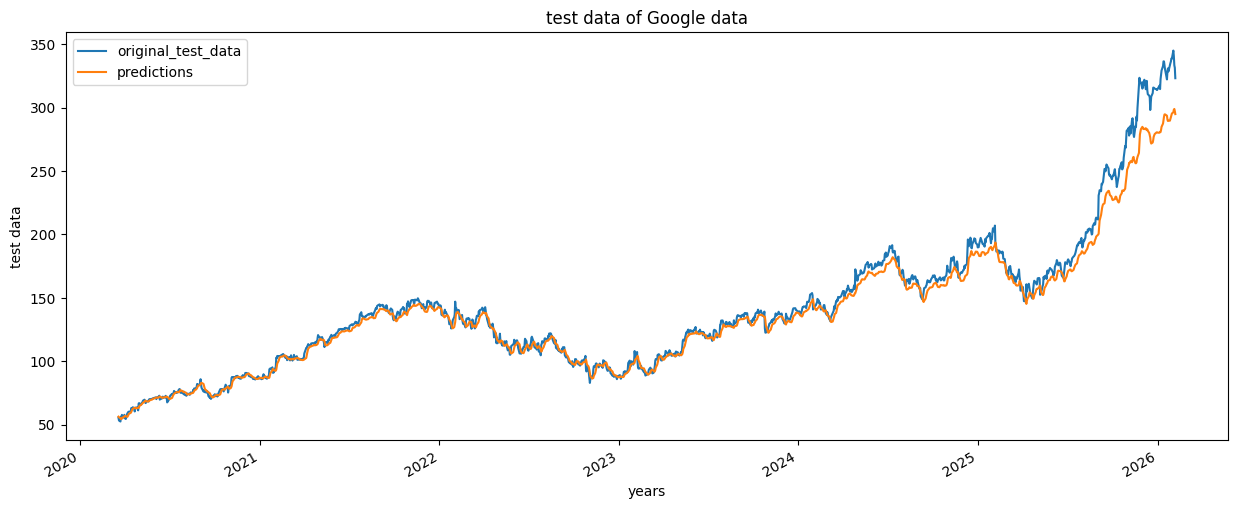

In [48]:
plot_graph((15,6), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

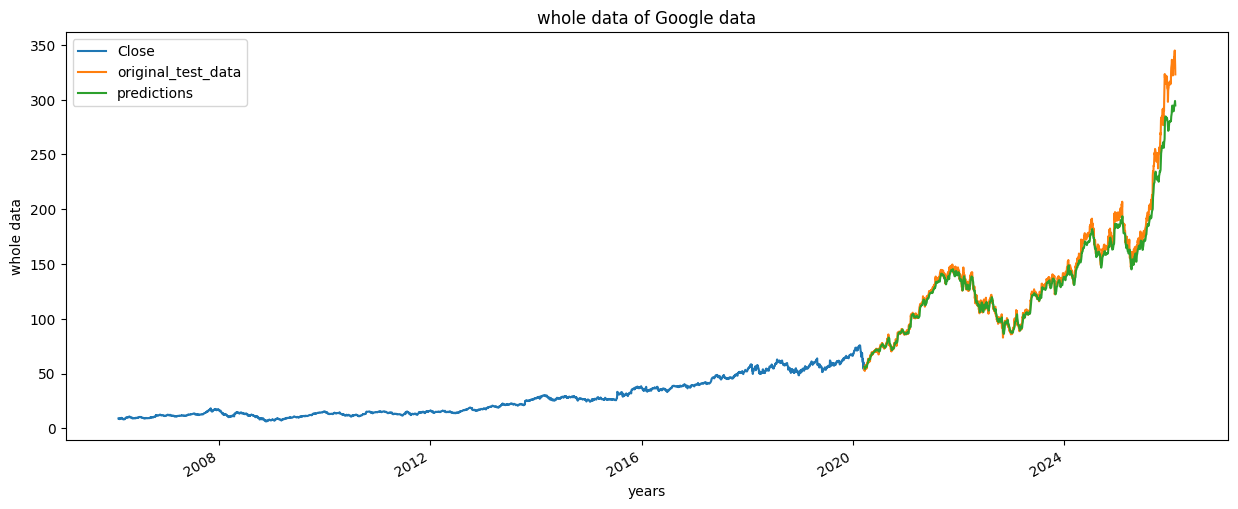

In [49]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],plotting_data], axis=0), 'whole data')

In [50]:
torch.save(model.state_dict(), "model.pth")
print("Model saved as model.pth")

Model saved as model.pth


In [51]:
import numpy as np

# Make predictions
model.eval()
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
with torch.no_grad():
    y_pred = model(x_test_tensor).cpu().numpy()

# Calculate MAE
mae = np.mean(np.abs(y_test - y_pred))

# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))

# Calculate MAPE
epsilon = 1e-10
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100

# Calculate R-squared
ss_res = np.sum((y_test - y_pred)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_res / ss_tot)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Square Error: {rmse:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 0.0168
Root Mean Square Error: 0.0289
Mean Absolute Percentage Error: 3.43%
R-squared: 0.9683


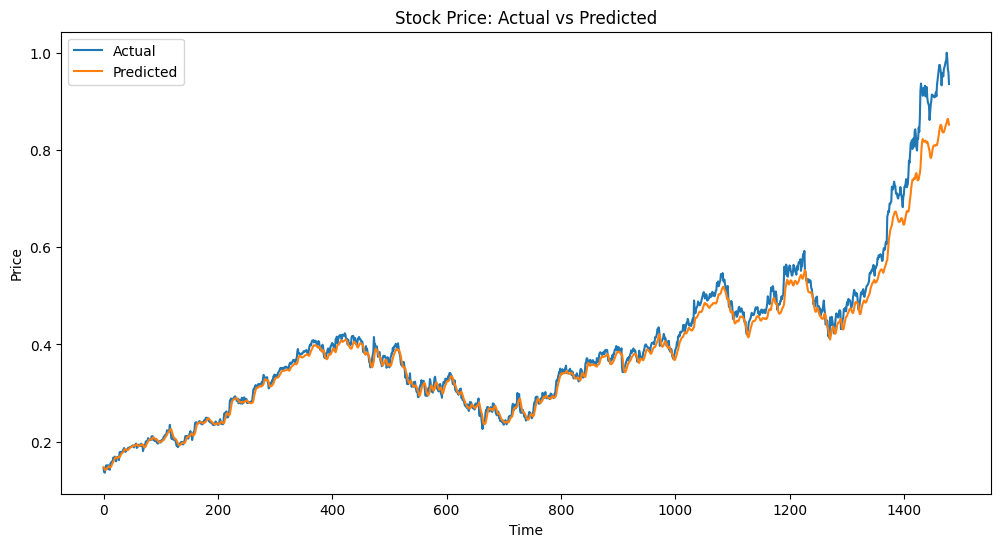

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Stock Price: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

Loaded model from model.pth
MAE: 5.6867
RMSE: 9.7883
MAPE: 3.27%
R2: 0.9683


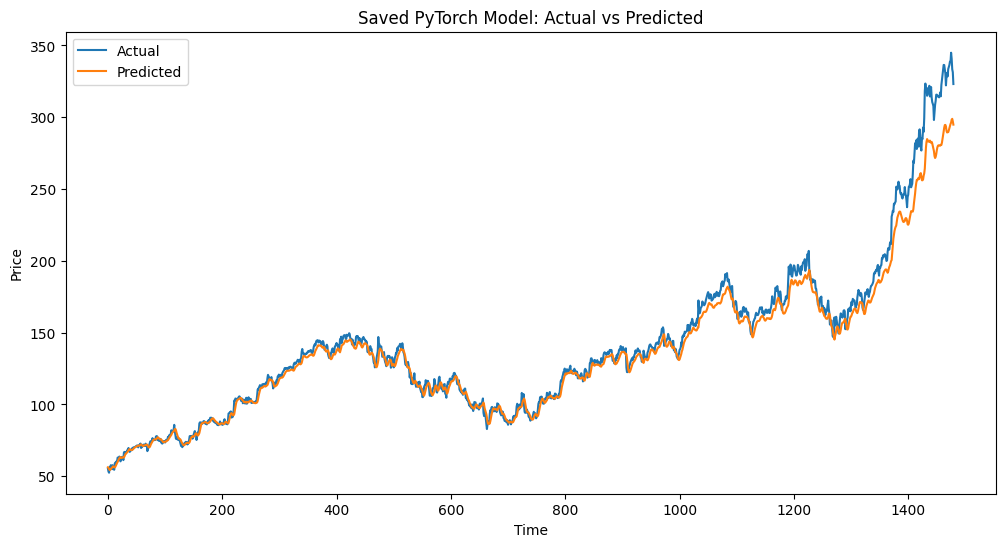

In [53]:
# Load saved model and evaluate on the test set
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

model_path = 'model.pth'

if not os.path.exists(model_path):
    print(f'Could not find saved model at {model_path}. Make sure you ran the training and model.save(...) cell.')
else:
    # Re-instantiate model structure
    # Note: These dimensions should match the training config
    input_dim = 1
    hidden_dim_1 = 128
    hidden_dim_2 = 64
    output_dim = 1
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model_loaded = StockPredictor(input_dim, hidden_dim_1, hidden_dim_2, output_dim).to(device)
    
    # Load weights
    model_loaded.load_state_dict(torch.load(model_path))
    model_loaded.eval()
    
    print('Loaded model from', model_path)

    if 'x_test' not in globals() or 'y_test' not in globals():
        print('x_test or y_test not found in the notebook. Run the data-prep/training cells before this evaluation.')
    else:
        # Predict with the loaded model
        x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
        with torch.no_grad():
            y_pred_loaded = model_loaded(x_test_tensor).cpu().numpy()

        # Inverse transform if scaler exists 
        if 'scaler' in globals():
            try:
                inv_y_pred = scaler.inverse_transform(y_pred_loaded)
                inv_y_test = scaler.inverse_transform(y_test)
            except Exception as e:
                print('Scaler inverse_transform failed:', e)
                inv_y_pred = y_pred_loaded
                inv_y_test = y_test
        else:
            inv_y_pred = y_pred_loaded
            inv_y_test = y_test

        # Ensure shapes are compatible and compute metrics
        try:
            # MAE
            mae = np.mean(np.abs(inv_y_test - inv_y_pred))
            
            # RMSE
            rmse = np.sqrt(np.mean((inv_y_test - inv_y_pred)**2))
            
            # MAPE
            epsilon = 1e-10 
            mape = np.mean(np.abs((inv_y_test - inv_y_pred) / (inv_y_test + epsilon))) * 100
            
            # R2
            ss_res = np.sum((inv_y_test - inv_y_pred)**2)
            ss_tot = np.sum((inv_y_test - np.mean(inv_y_test))**2)
            r2 = 1 - (ss_res / ss_tot)
            
            print(f'MAE: {mae:.4f}')
            print(f'RMSE: {rmse:.4f}')
            print(f'MAPE: {mape:.2f}%')
            print(f'R2: {r2:.4f}')
        except Exception as e:
            print('Error computing metrics:', e)

        # Plot actual vs predicted
        plt.figure(figsize=(12,6))
        try:
            plt.plot(inv_y_test.reshape(-1), label='Actual')
            plt.plot(inv_y_pred.reshape(-1), label='Predicted')
            plt.legend()
            plt.title('Saved PyTorch Model: Actual vs Predicted')
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.show()
        except Exception as e:
            print('Error plotting results:', e)